In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [11]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage=requests.get('https://www.coursera.org/certificates/data-science',headers = headers).text

In [12]:
soup = BeautifulSoup(webpage,'html5lib') # lxml is a html parser

In [13]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" itemtype="http://schema.org" lang="en" xmlns:fb="http://ogp.me/ns/fb#">
 <head>
  <link crossorigin="" href="https://d3njjcbhbojbot.cloudfront.net" rel="preconnect"/>
  <meta content="IE=Edge,chrome=IE7" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="Coursera" property="og:site_name"/>
  <meta content="727836538,4807654" property="fb:admins"/>
  <meta content="823425307723964" property="fb:app_id"/>
  <meta content="Coursera" name="twitter:site"/>
  <meta content="Coursera" name="twitter:app:name:iphone"/>
  <meta content="Coursera" name="twitter:app:name:ipad"/>
  <meta content="Coursera" name="twitter:app:name:googleplay"/>
  <meta content="id736535961" name="twitter:app:id:iphone"/>
  <meta content="id736535961" name="twitter:app:id:ipad"/>
  <meta content="org.coursera.android" name="twitter:app:id:googleplay"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://d3njjcbhbojbot.clou

In [162]:
course_box = soup.find_all('div',class_='cds-93')
length = len(course_box)

In [198]:
course = []
company = []
months = []
hours = []
def parse_hour(value):
    values = value
    for i,j in enumerate(values):
        if j == ("hours") or j =="hrs":
            return value[i-1]
    
for i in range(len(course_box)):
    desc = course_box[i].find_all('p')
    print(desc[2].text.split())
    course.append(desc[0].text)
    company.append(desc[1].text.split()[2])
    months.append(desc[2].text.split(' ')[0])
    hours.append(parse_hour(desc[2].text.split(' ')))

coursera = {'Course':course,'Offered By':company,'Months':months,'Hours':hours}
    
course_df = pd.DataFrame(coursera)

['6', 'months', 'at', '6', 'hours', 'per', 'week']
['3', 'months', 'at', '12', 'hours', 'per', 'week']
['7', 'months', 'to', 'complete', 'at', '3', 'hours', 'per', 'week']
['3', 'months', 'at', '10', 'hrs', 'per', 'week']
['6', 'months', 'at', '10', 'hours', 'per', 'week']
['6', 'months', 'at', '4', 'hours', 'per', 'week']
['8', 'months', 'at', '3', 'hours', 'per', 'week']
['6', 'months', 'at', '10', 'hours', 'per', 'week']
['2', 'months', 'at', '10', 'hours', 'a', 'week']
['6.5', 'months', 'at', '4', 'hours', 'per', 'week']
['4', 'months', 'at', '5', 'hours', 'per', 'week']
['7', 'months', 'at', '2', 'hours', 'per', 'week']
['3', 'months', 'at', '5', 'hours', 'per', 'week']
['5', 'months,', '3', 'hours', 'per', 'week']
['6', 'months', 'at', '4', 'hours', 'per', 'week']
['6', 'months', 'at', '3', 'hours', 'per', 'week']
['3-4', 'months', 'at', '12', 'hours', 'per', 'week']
['3', 'months', 'at', '12', 'hours', 'per', 'week']
['1.5', 'months', 'at', '5', 'hours', 'per', 'week']
['2', 'mo

In [199]:
course_df

,Course,Offered By,Months,Hours
0,Meta Database Engineer Professional Certificate,Meta,6,6
1,IBM Data Science Professional Certificate,IBM,3,12
2,IBM Data Engineering Professional Certificate,IBM,7,3
3,IBM Data Analyst Professional Certificate,IBM,3,10
4,Google Data Analytics Professional Certificate,Google,6,10
5,IBM Data Analytics with Excel and R Profession...,IBM,6,4
6,IBM Data Warehouse Engineer Professional Certi...,IBM,8,3
7,Google Advanced Data Analytics Professional Ce...,Google,6,10
8,Google Business Intelligence Professional Cert...,Google,2,10
9,Microsoft Azure Data Scientist Associate (DP-1...,Microsoft,6.5,4


In [200]:
course_df.isnull().sum()

Course         0
Offered By     0
Months         0
Hours         12
dtype: int64

In [201]:
course_df.dropna(inplace=True)

In [202]:
course_df

,Course,Offered By,Months,Hours
0,Meta Database Engineer Professional Certificate,Meta,6,6
1,IBM Data Science Professional Certificate,IBM,3,12
2,IBM Data Engineering Professional Certificate,IBM,7,3
3,IBM Data Analyst Professional Certificate,IBM,3,10
4,Google Data Analytics Professional Certificate,Google,6,10
5,IBM Data Analytics with Excel and R Profession...,IBM,6,4
6,IBM Data Warehouse Engineer Professional Certi...,IBM,8,3
7,Google Advanced Data Analytics Professional Ce...,Google,6,10
8,Google Business Intelligence Professional Cert...,Google,2,10
9,Microsoft Azure Data Scientist Associate (DP-1...,Microsoft,6.5,4


In [203]:
course_df.sort_values('Offered By')

,Course,Offered By,Months,Hours
15,CertNexus Certified Ethical Emerging Technolog...,CertNexus,6,3
14,CertNexus Certified Data Science Practitioner ...,CertNexus,6,4
10,DeepLearning.AI TensorFlow Developer Professio...,DeepLearning.AI,4,5
4,Google Data Analytics Professional Certificate,Google,6,10
7,Google Advanced Data Analytics Professional Ce...,Google,6,10
8,Google Business Intelligence Professional Cert...,Google,2,10
18,Preparing for Google Cloud Certification: Clou...,Google,1.5,5
1,IBM Data Science Professional Certificate,IBM,3,12
2,IBM Data Engineering Professional Certificate,IBM,7,3
3,IBM Data Analyst Professional Certificate,IBM,3,10


<Axes: title={'center': 'Coursera Data Science Certificate Courses'}, xlabel='Offered By', ylabel='No. of courses provided'>

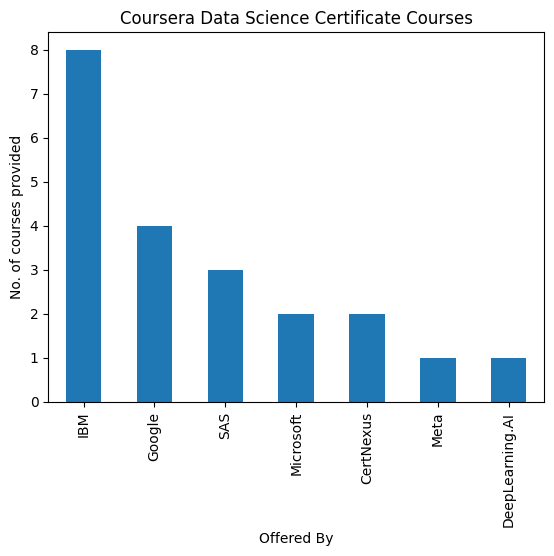

In [210]:
course_df['Offered By'].value_counts().plot(kind = 'bar',
                                            xlabel = "Offered By",
                                            ylabel = "No. of courses provided",
                                           title = "Coursera Data Science Certificate Courses")